## Circuit creation

In [34]:
L = 8
J = 1
h = 0.05
lamb = 0.5

particle_pair_left_position = 3
particle_pair_length = 1

final_time = 10
layers = 100
measure_every_layers = 1

In [35]:
import z2chain.circs as circs

logical_circs = circs.particle_pair_quench_simulation_circuits(L, J, h, lamb, particle_pair_left_position, particle_pair_length, final_time, layers, measure_every_layers)

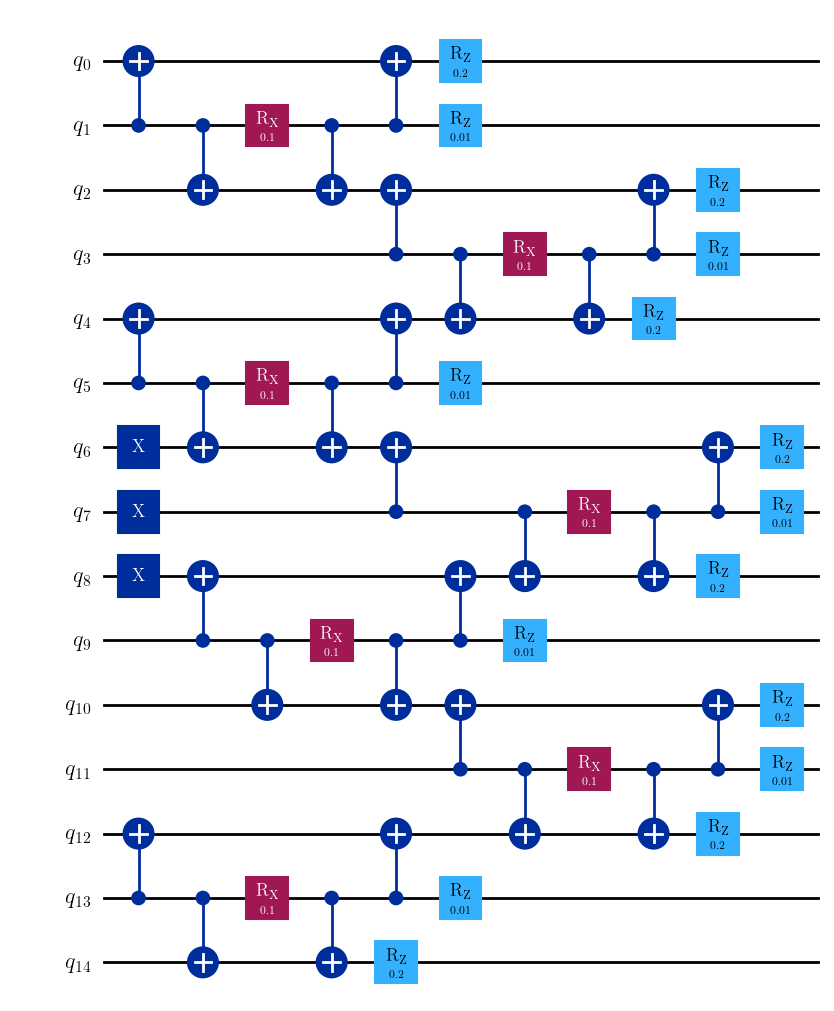

In [36]:
logical_circs[1].draw(output="mpl")

## Ideal statevector circuit simulation

In [37]:
from utils.sexec import execute_simulation_estimator_batch
from z2chain.qiskit_observables import local_pauli_z
from functools import partial

estimator_options = {
    "default_precision": 0
}

simulator_options = {
    "method": "statevector"
}

observables_generating_funcs = [partial(local_pauli_z, qubit_ind=i) for i in range(2*L-1)]

jobs = execute_simulation_estimator_batch(simulator_options, estimator_options, logical_circs, observables_generating_funcs)

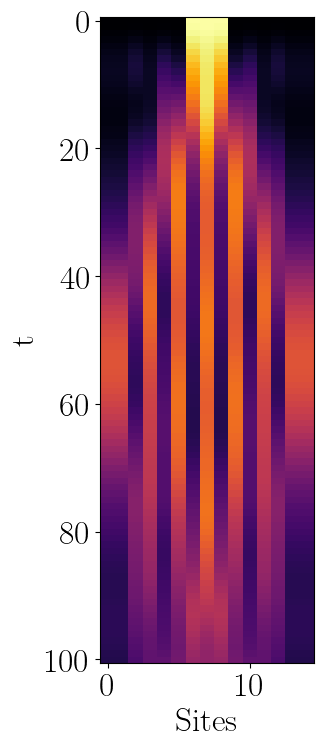

In [38]:
from z2chain.plotting import x_t_plot

x_t_plot(jobs)

## Comparison with ED

In [39]:
final_time = 10
steps = 100

results_filepath = f"Results/dual_z2ppairquench_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}_pp_{particle_pair_left_position}_pl_{particle_pair_length}.txt"
overwrite = False

import z2chain.exact as z2ced

exact_occupation_site_gauge_matrix = z2ced.dual_particle_pair_quench_simulation(L, J, h, lamb, particle_pair_left_position, final_time, steps, filepath=results_filepath, overwrite=overwrite, print_mode=True)

t = 1000.0000 / t_f = 1000.0000                  

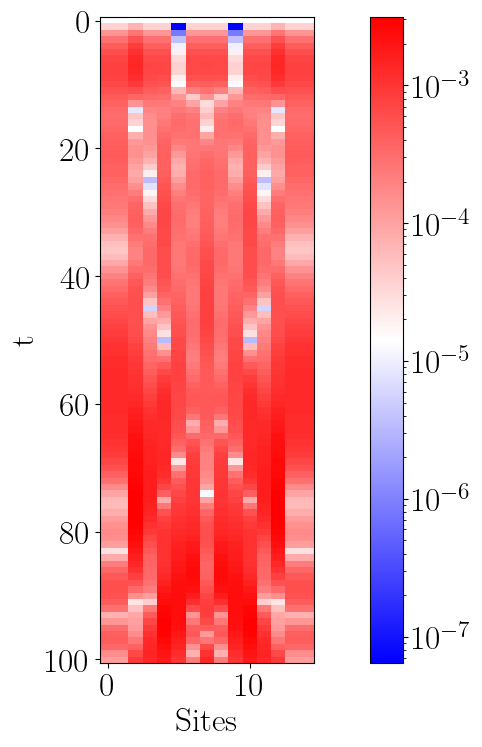

In [40]:
from z2chain.plotting import discrepancies_plot

discrepancies_plot(exact_occupation_site_gauge_matrix, jobs)

In [41]:
final_time = 10
steps = 100

results_filepath = f"Results/trotter_z2ppairquench_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}.txt"
overwrite = False

import z2chain.exact as z2ced

trotter_ed_occupation_site_gauge_matrix = z2ced.trotter_particle_pair_quench_simulation(L, J, h, lamb, particle_pair_left_position, final_time, steps, filepath=results_filepath, overwrite=overwrite, print_mode=True)

t = 50.0000 / t_f = 10.0000 / Trotter_steps = 5 of 100

/Users/cobos/MEGAsync/Doctorado/2nd year/IBM hardware execution/Repo/src/z2chain/exact.py:142: ComplexWarning: Casting complex values to real discards the imaginary part
  site_gauge_occupation_matrix[i // measure_every_layers] = this_qubits_occupation


t = 990.0000 / t_f = 10.0000 / Trotter_steps = 99 of 100

/Users/cobos/MEGAsync/Doctorado/2nd year/IBM hardware execution/Repo/src/z2chain/exact.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  site_gauge_occupation_matrix[-1] = this_qubits_occupation


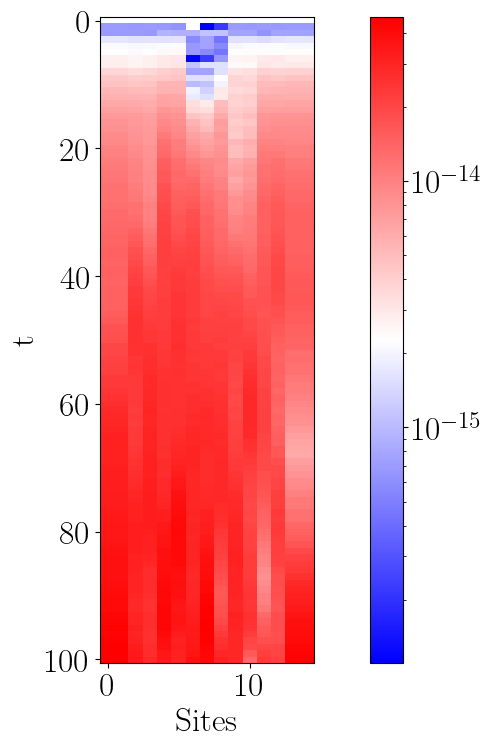

In [42]:
from z2chain.plotting import discrepancies_plot

discrepancies_plot(trotter_ed_occupation_site_gauge_matrix, jobs)

## They are identical up to numerical errors ✅